# Data Preprocessing and Cleaning

This notebook covers the initial data preprocessing steps for the Heart Disease UCI dataset:
1. Loading the dataset
2. Handling missing values
3. Data encoding
4. Feature scaling
5. Basic exploratory data analysis


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## 1. Load the Dataset


In [2]:
# Load the dataset
df = pd.read_csv('../data/heart_disease.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()


Dataset Shape: (303, 14)

Column Names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Check data types and missing values
print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nData Summary:")
df.info()


Data Types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float

## 2. Handle Missing Values


In [4]:
# Check for '?' values which represent missing data in UCI datasets
print("Checking for '?' values in each column:")
for col in df.columns:
    if df[col].dtype == 'object':
        # Use regex=False to avoid regex interpretation of '?'
        question_marks = df[col].str.contains('?', na=False, regex=False).sum()
        if question_marks > 0:
            print(f"{col}: {question_marks} '?' values")

# Replace '?' with NaN
df = df.replace('?', np.nan)

# Convert all columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check missing values after conversion
print("\nMissing values after conversion:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")


Checking for '?' values in each column:
ca: 4 '?' values
thal: 2 '?' values

Missing values after conversion:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Total missing values: 6


In [5]:
# Handle missing values
# For categorical columns (ca, thal), use mode imputation
# For numerical columns, use median imputation

from sklearn.impute import SimpleImputer

# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()
print(f"Columns with missing values: {missing_cols}")

# Impute missing values
for col in missing_cols:
    if col in ['ca', 'thal']:  # These are categorical
        # Use mode (most frequent value)
        mode_value = df[col].mode()[0] if len(df[col].mode()) > 0 else 0
        df[col].fillna(mode_value, inplace=True)
    else:
        # Use median for numerical columns
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

# Verify no missing values remain
print(f"\nMissing values after imputation: {df.isnull().sum().sum()}")

# Save the cleaned dataset
df.to_csv('../data/heart_disease_cleaned.csv', index=False)
print("\nCleaned dataset saved to '../data/heart_disease_cleaned.csv'")


Columns with missing values: ['ca', 'thal']

Missing values after imputation: 0

Cleaned dataset saved to '../data/heart_disease_cleaned.csv'


## 3. Data Encoding and Feature Engineering


In [6]:
# Prepare target variable - convert to binary classification
# Original target: 0 = no disease, 1,2,3,4 = disease
print("Original target distribution:")
print(df['target'].value_counts().sort_index())

# Convert to binary: 0 = no disease, 1 = disease
df['target'] = (df['target'] > 0).astype(int)

print("\nBinary target distribution:")
print(df['target'].value_counts().sort_index())

# Display basic statistics
print("\nDataset Statistics:")
df.describe()


Original target distribution:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Binary target distribution:
target
0    164
1    139
Name: count, dtype: int64

Dataset Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## 4. Feature Scaling


In [7]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target distribution: {y_train.value_counts().sort_index().values}")
print(f"Test target distribution: {y_test.value_counts().sort_index().values}")


Features shape: (303, 13)
Target shape: (303,)

Training set: (242, 13)
Test set: (61, 13)
Training target distribution: [131 111]
Test target distribution: [33 28]


In [8]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("Feature scaling completed!")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")

# Display scaled data statistics
print("\nScaled data statistics (first 5 features):")
print(X_train_scaled.iloc[:, :5].describe())


Feature scaling completed!
Scaled training data shape: (242, 13)
Scaled test data shape: (61, 13)

Scaled data statistics (first 5 features):
                age           sex            cp      trestbps          chol
count  2.420000e+02  2.420000e+02  2.420000e+02  2.420000e+02  2.420000e+02
mean  -1.835079e-16  1.027644e-16  1.807553e-16 -3.853667e-16  1.468064e-16
std    1.002073e+00  1.002073e+00  1.002073e+00  1.002073e+00  1.002073e+00
min   -2.845681e+00 -1.463850e+00 -2.211502e+00 -2.101584e+00 -2.348209e+00
25%   -7.294848e-01 -1.463850e+00 -9.274725e-01 -6.231442e-01 -7.174932e-01
50%    1.615452e-01  6.831301e-01 -1.570548e-01 -5.451337e-02 -1.012342e-01
75%    7.184390e-01  6.831301e-01  8.701687e-01  5.141174e-01  5.292462e-01
max    2.500499e+00  6.831301e-01  8.701687e-01  3.925902e+00  5.957066e+00


## 5. Basic Exploratory Data Analysis


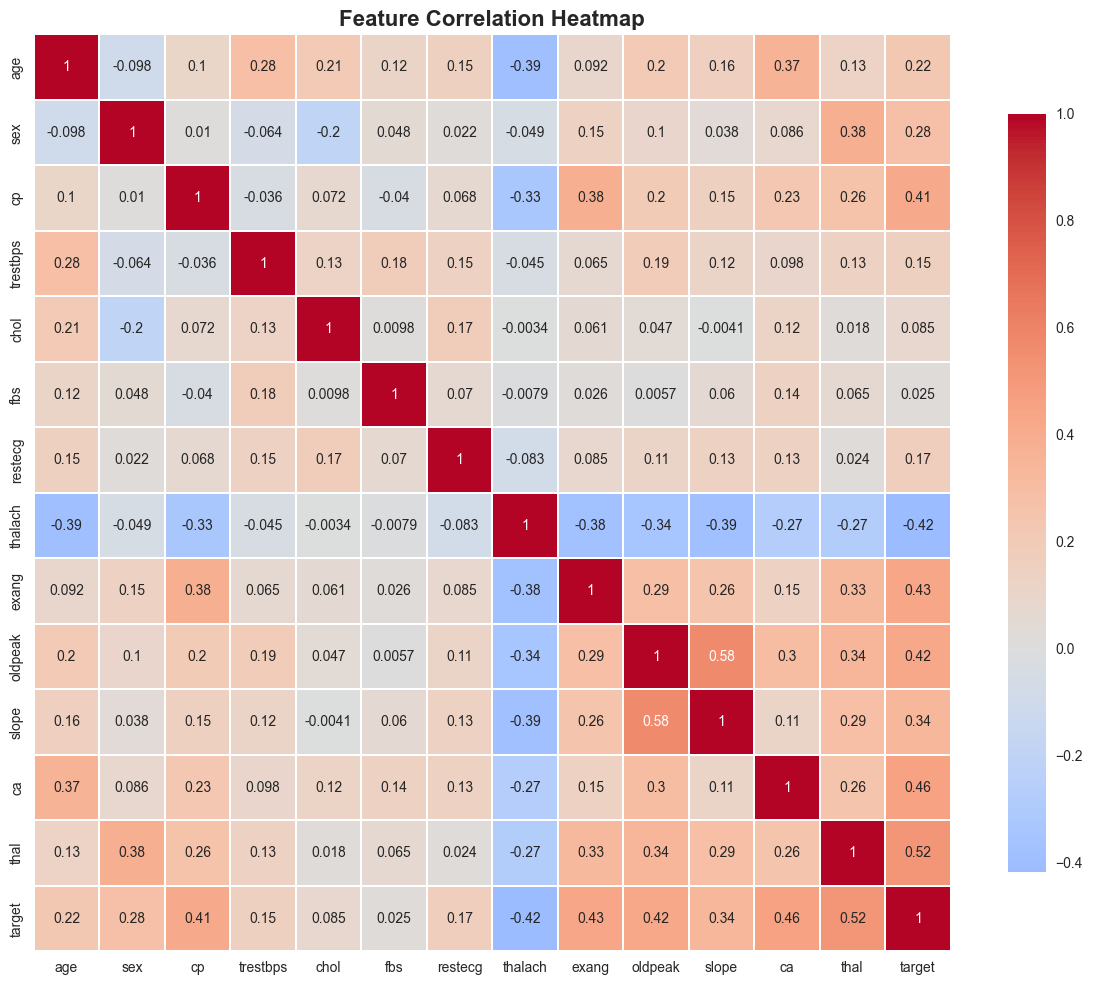

Correlations with target variable:
target      1.000000
thal        0.522057
ca          0.460033
exang       0.431894
oldpeak     0.424510
thalach     0.417167
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
Name: target, dtype: float64


In [9]:
# Create correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.1, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Show correlations with target
print("Correlations with target variable:")
target_corr = correlation_matrix['target'].abs().sort_values(ascending=False)
print(target_corr)


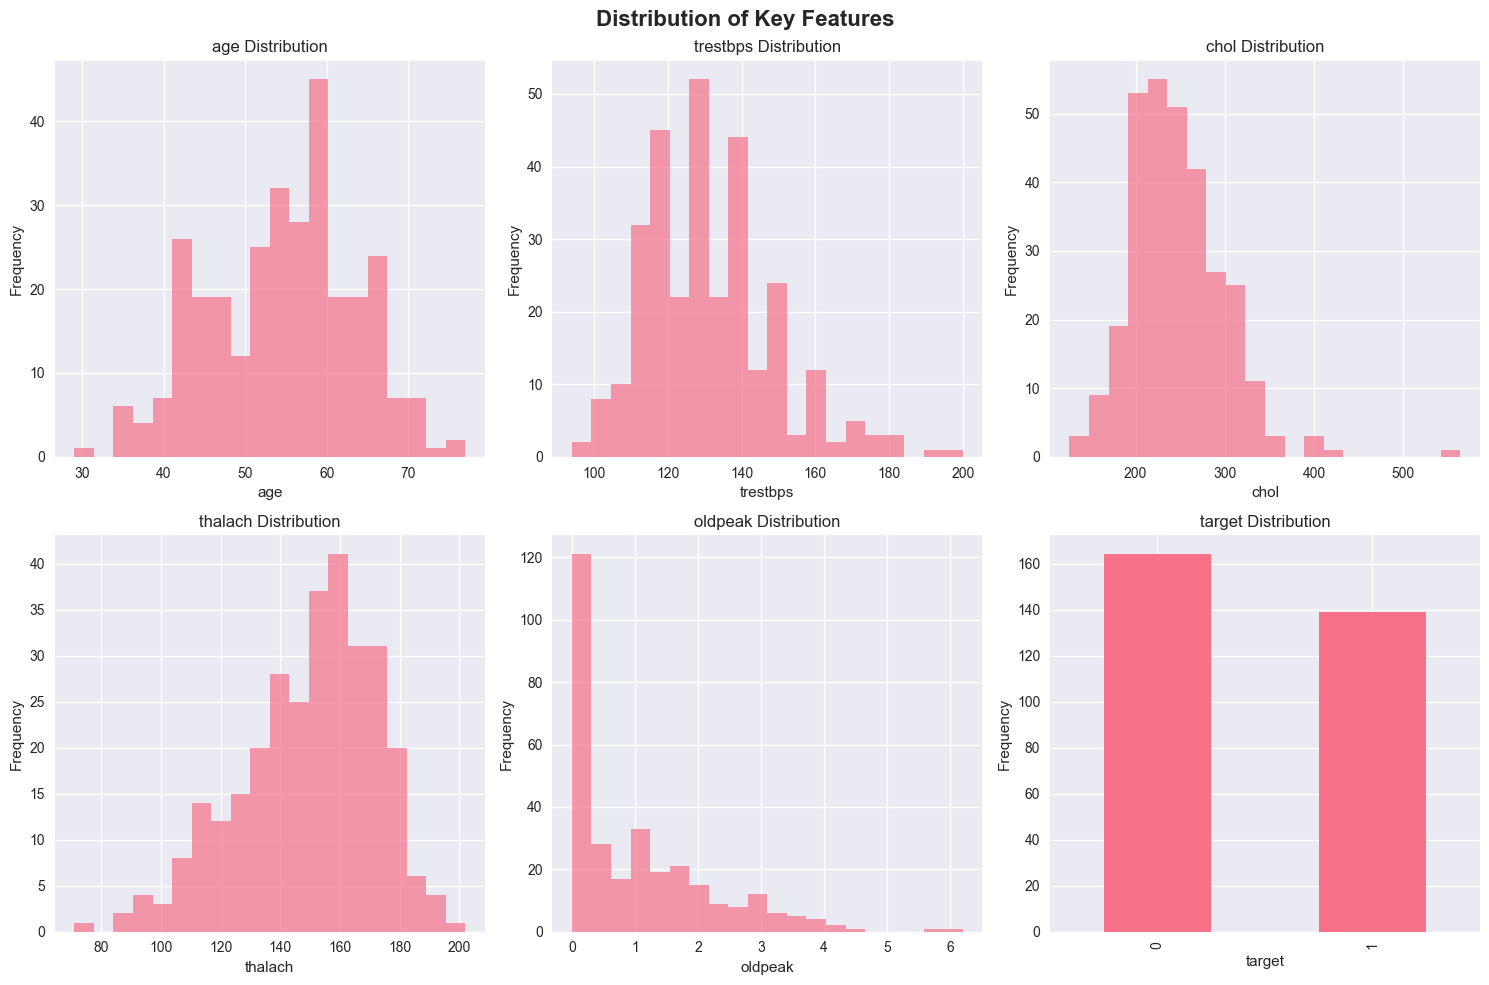

In [10]:
# Distribution plots for key features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Key Features', fontsize=16, fontweight='bold')

key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

for i, feature in enumerate(key_features):
    row = i // 3
    col = i % 3
    
    if feature == 'target':
        df[feature].value_counts().plot(kind='bar', ax=axes[row, col])
        axes[row, col].set_title(f'{feature} Distribution')
    else:
        df[feature].hist(bins=20, ax=axes[row, col], alpha=0.7)
        axes[row, col].set_title(f'{feature} Distribution')
    
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [11]:
# Save processed data for next notebooks
import joblib

# Save the scaler for future use
joblib.dump(scaler, '../models/scaler.pkl')

# Save processed datasets
X_train_scaled.to_csv('../data/X_train_scaled.csv', index=False)
X_test_scaled.to_csv('../data/X_test_scaled.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

# Also save the original split data (before scaling)
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)

print("Data preprocessing completed!")
print("Cleaned and scaled datasets saved!")
print("Scaler model saved!")
print("\nFiles saved:")
print("- ../data/heart_disease_cleaned.csv")
print("- ../data/X_train_scaled.csv, X_test_scaled.csv")
print("- ../data/X_train.csv, X_test.csv") 
print("- ../data/y_train.csv, y_test.csv")
print("- ../models/scaler.pkl")


Data preprocessing completed!
Cleaned and scaled datasets saved!
Scaler model saved!

Files saved:
- ../data/heart_disease_cleaned.csv
- ../data/X_train_scaled.csv, X_test_scaled.csv
- ../data/X_train.csv, X_test.csv
- ../data/y_train.csv, y_test.csv
- ../models/scaler.pkl
